In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [59]:
file_path = r"C:\Users\DELL\Downloads\online+shoppers+purchasing+intention+dataset"
data = pd.read_csv(file_path + r"\online_shoppers_intention.csv")


In [61]:
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [63]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")


Rows: 12330, Columns: 18


In [65]:
data.describe()  # For numerical columns
data.describe(include='object')  # For categorical columns


,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [67]:
print(data.columns)


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [69]:
print(data.dtypes)


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [71]:
print(data.isnull().sum())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [73]:
print(f"Duplicate Rows: {data.duplicated().sum()}")


Duplicate Rows: 125


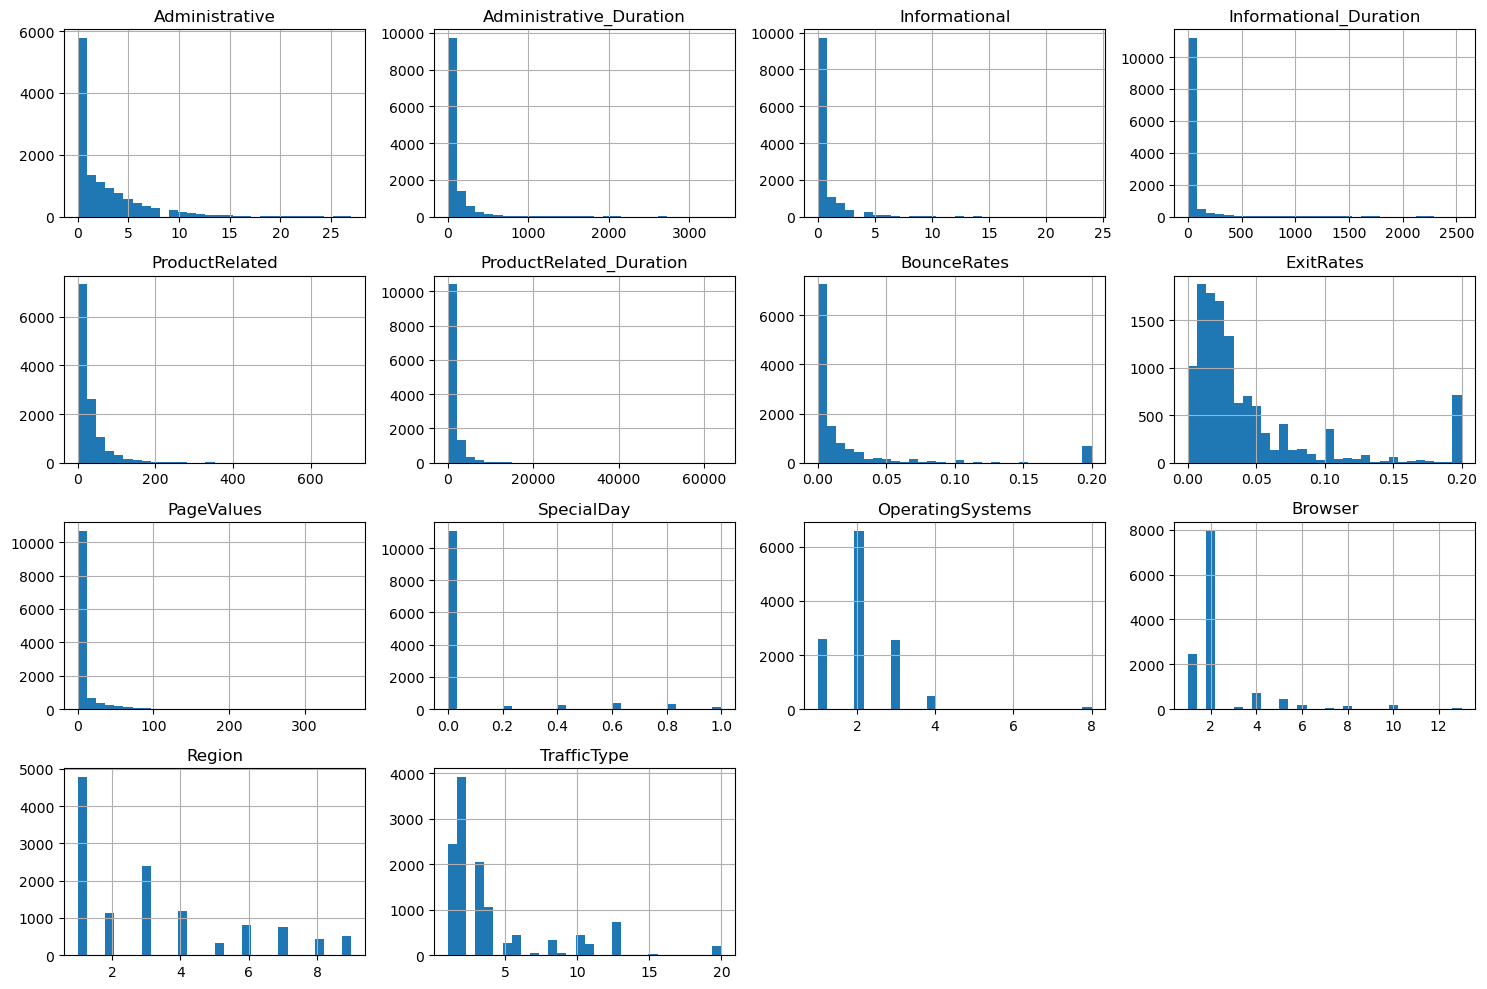

In [75]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


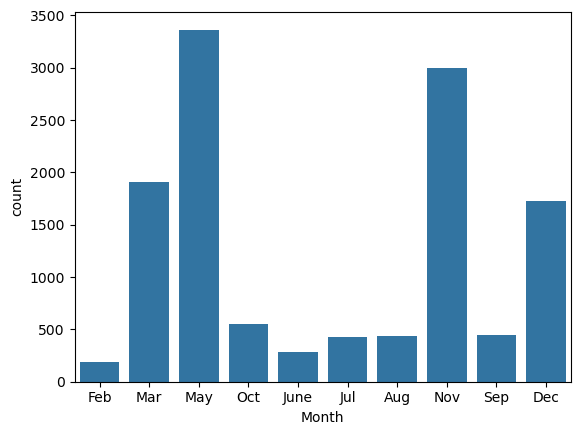

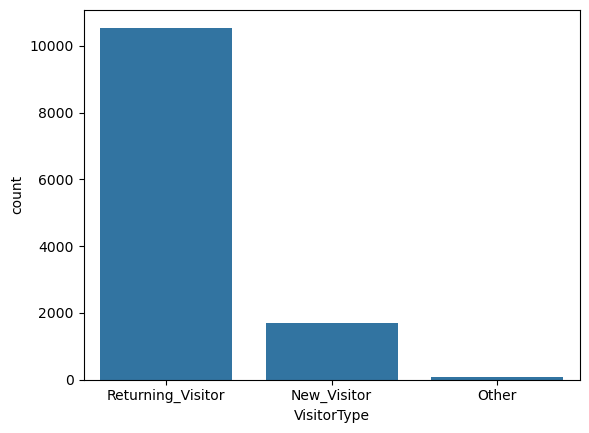

In [77]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    sns.countplot(x=col, data=data)
    plt.show()


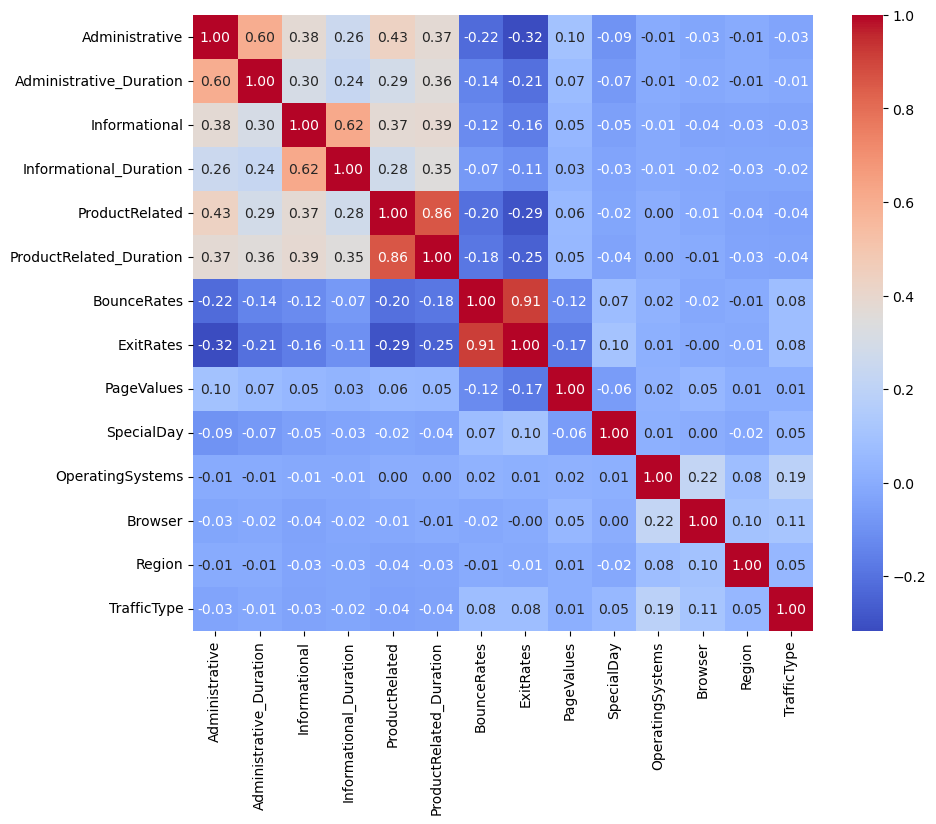

In [81]:
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [83]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())


In [91]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if data[col].mode().empty:
        data[col].fillna("Unknown", inplace=True)
    else:
       data[col] = data[col].fillna(data[col].mode()[0])



In [93]:
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])


In [95]:
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


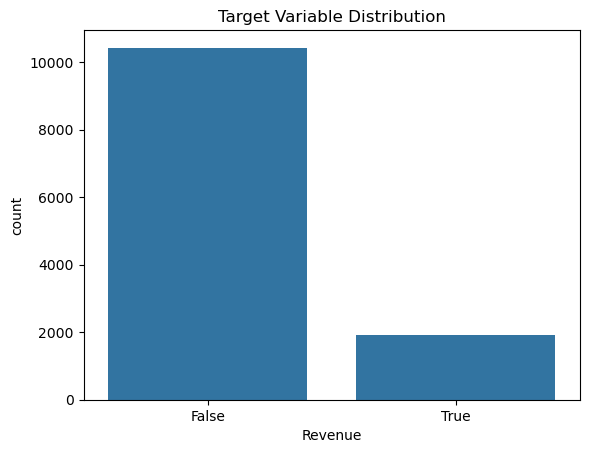

In [101]:
# Check distribution of target variable
sns.countplot(x='Revenue', data=data)
plt.title('Target Variable Distribution')
plt.show()


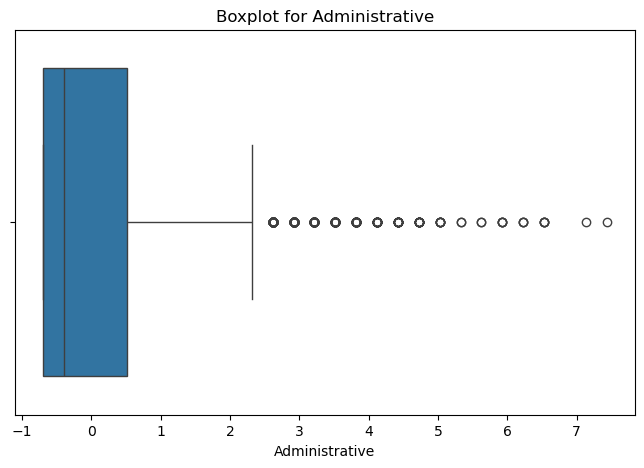

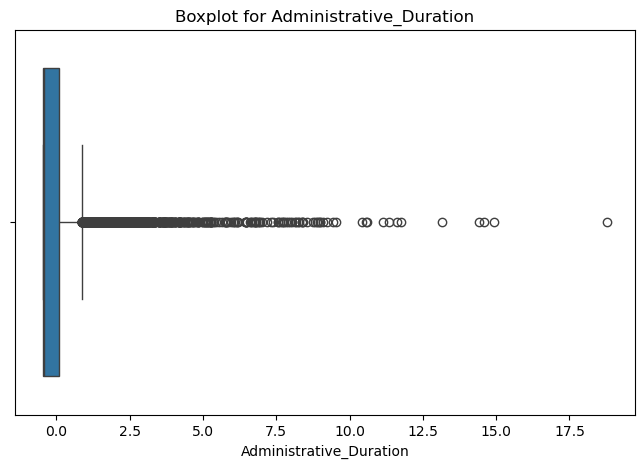

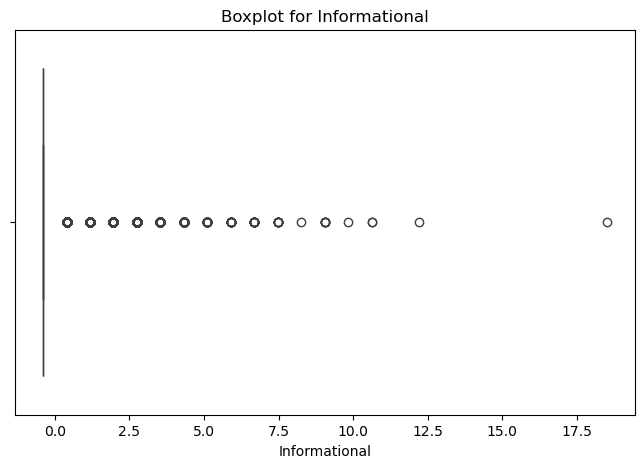

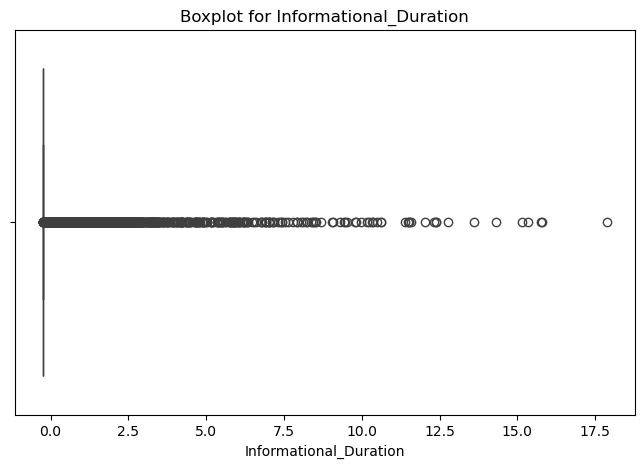

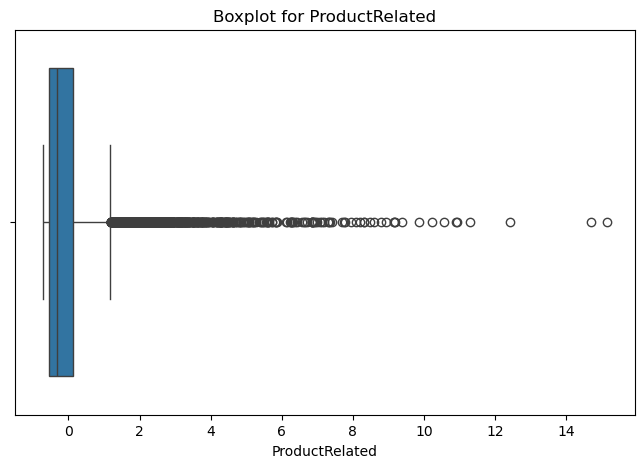

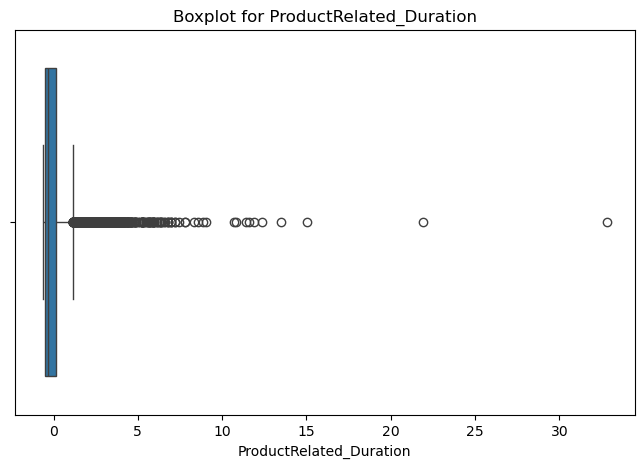

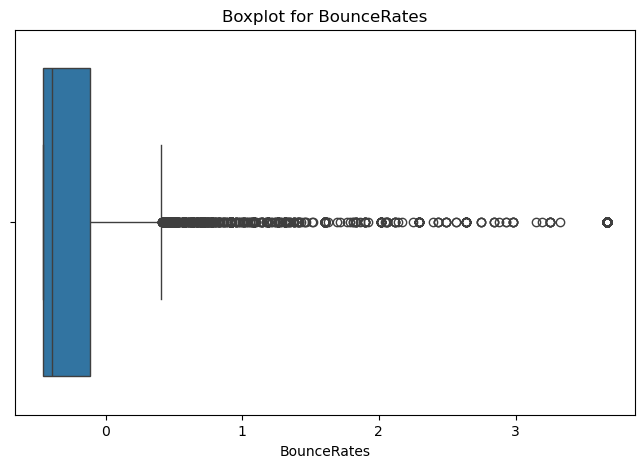

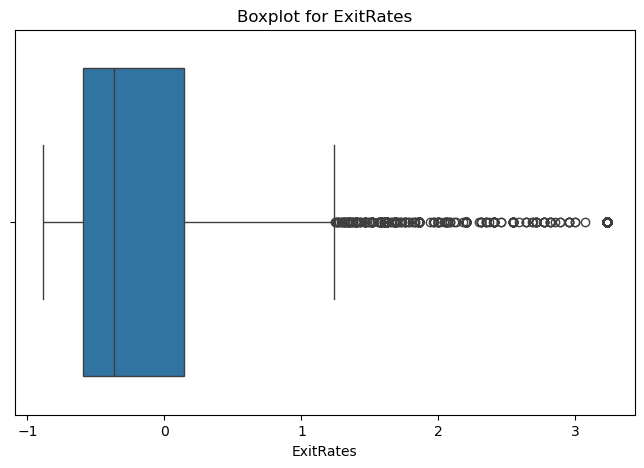

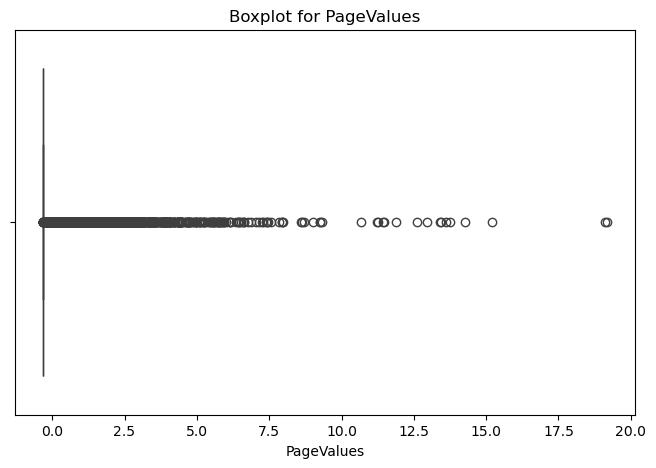

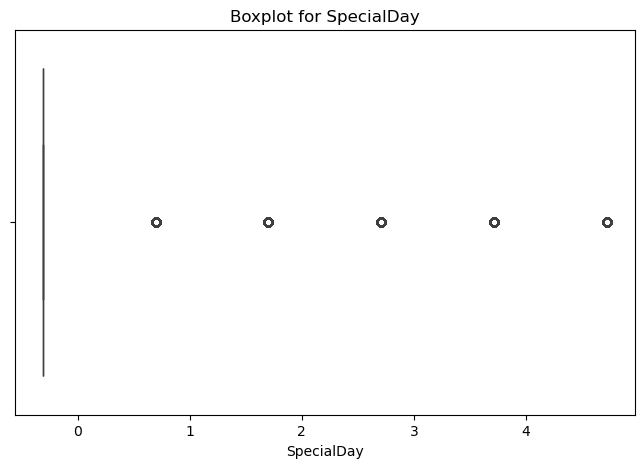

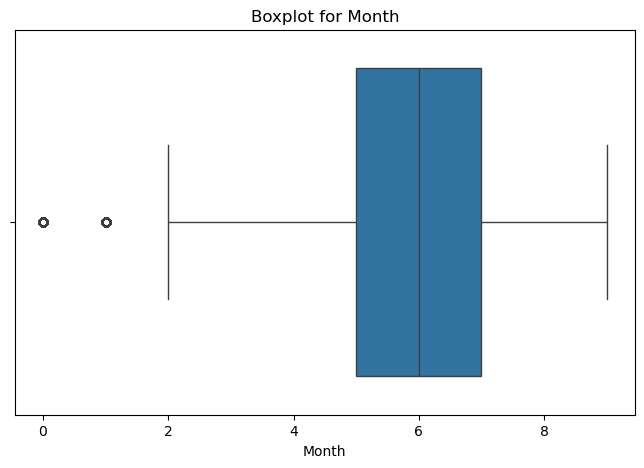

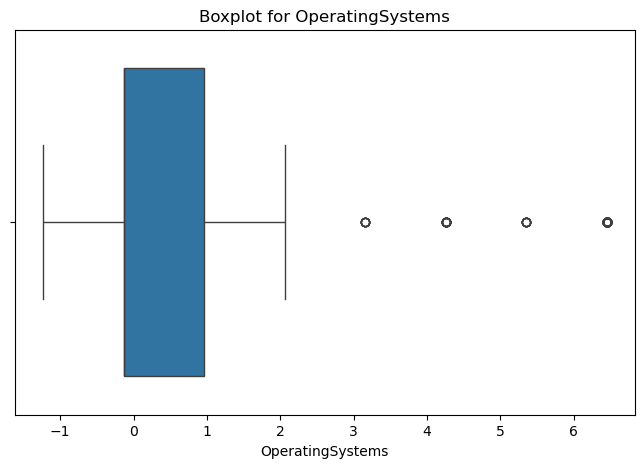

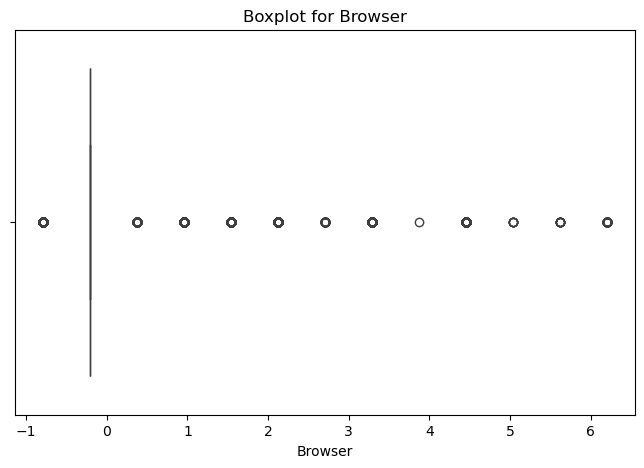

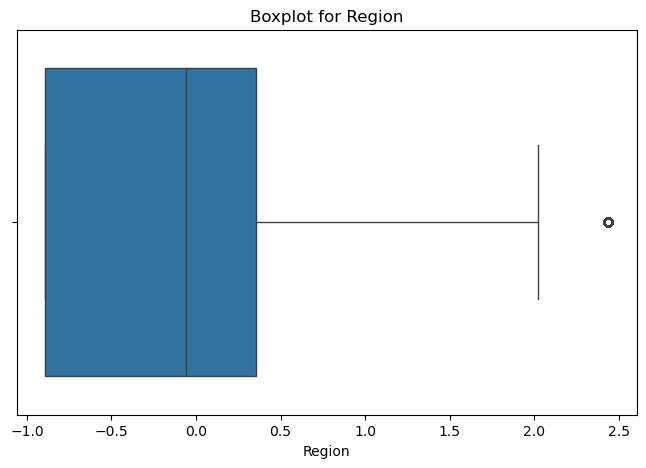

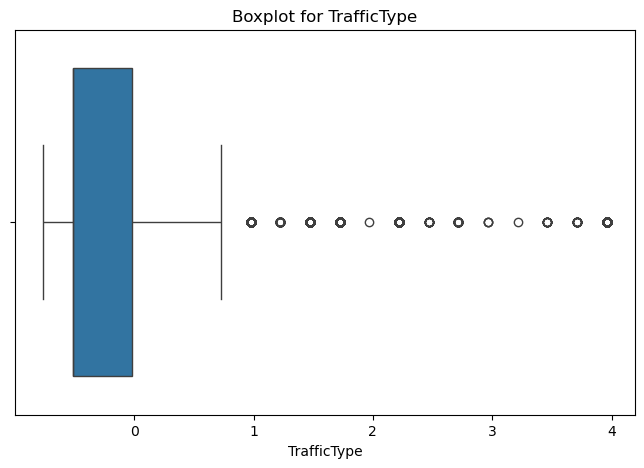

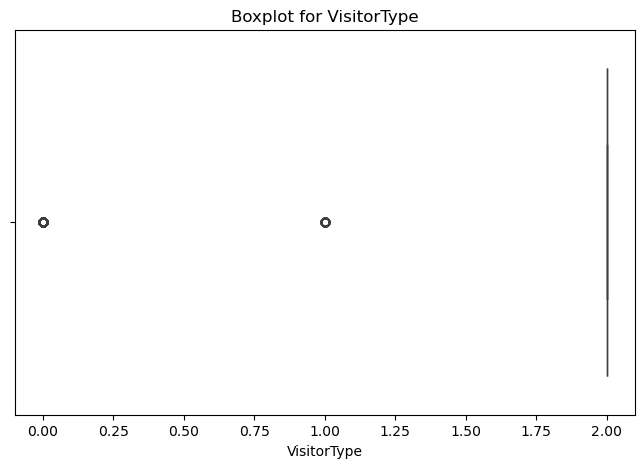

In [103]:
# Create boxplots for numerical features
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [105]:
data.to_csv(file_path + r"\cleaned_online_shoppers_intention.csv", index=False)